In [1]:
########################################################
###############Step 3###################################
########################################################
############ trip dates are: 4/25/2018 - 5/7/2018#######

In [2]:
import pandas as pd
import numpy as np
import os
import datetime as dt
import matplotlib
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt

In [3]:
### BEGIN SOLUTION
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func 
from sqlalchemy import Column, Integer, String, Float, Text, ForeignKey

In [4]:
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)

In [5]:
inspector = inspect(engine)
inspector.get_table_names()

['measurements', 'station']

In [6]:
columns = inspector.get_columns('measurements')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station VARCHAR(25)
date VARCHAR(25)
prcp FLOAT
tobs INTEGER


In [7]:
# Test that the insert works by fetching the first 5 rows. 
engine.execute("select * from station limit 5").fetchall()
#engine.execute("select * from measurements limit 5").fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [8]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
Station = Base.classes.station
Measurements = Base.classes.measurements

In [9]:
session = Session(engine)

In [10]:
#Peciptation Analyis

In [11]:
# Grabs the last date entry in the data table
last_date = session.query(Measurements.date).order_by(Measurements.date.desc()).first()
print(last_date)

('2017-08-23',)


In [12]:

# to get the last 12 months of data, last date - 365# to get 
last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(last_year)

2016-08-23


In [13]:
#Pulling rain data and putting it in a dataframe
rain = session.query(Measurements.date, Measurements.prcp).\
    filter(Measurements.date > last_year).\
    order_by(Measurements.date).all()
    
rain_df = pd.DataFrame(rain)#.set_index('date')
rain_df.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,0.00
4,2016-08-24,1.22


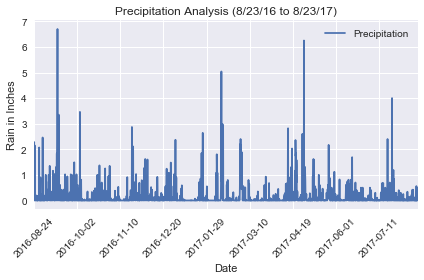

In [14]:
# plotting rain datafram 

rain_df.plot('date', 'prcp')
plt.xlabel("Date")
plt.ylabel("Rain in Inches")
plt.title("Precipitation Analysis (8/23/16 to 8/23/17)")
plt.legend(["Precipitation"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
#pRINTING THE STATISTICS
rain_df.describe()

,prcp
count,2223.000000
mean,0.159951
std,0.441220
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


In [16]:
#STATION ANALYSIS

In [17]:
# Count the number of stations in the Measurement table
locations = session.query(Measurements).group_by(Measurements.station).count()
locations_ID = session.query(Measurements).group_by(Measurements.station)


In [18]:
print("There are a total of {} stations.".format(locations))

  

There are a total of 9 stations.


In [19]:
# find the station with the most temperature observations, then list them all in descending order
busy_station = session.query(Measurements.station, func.count(Measurements.tobs)).group_by(Measurements.station).\
               order_by(func.count(Measurements.tobs).desc()).all()

busiest = busy_station[0][0]    
print("The busiest Station was",busiest,"with",busy_station[0][1],"weather observations.")
print()
print("Here are all of the Stations (in descending order) with their number of observations:")
for station, count in busy_station:
    print("Station",station,"had",count, "weather observations.")

The busiest Station was USC00519281 with 2772 weather observations.

Here are all of the Stations (in descending order) with their number of observations:
Station USC00519281 had 2772 weather observations.
Station USC00519397 had 2724 weather observations.
Station USC00513117 had 2709 weather observations.
Station USC00519523 had 2669 weather observations.
Station USC00516128 had 2612 weather observations.
Station USC00514830 had 2202 weather observations.
Station USC00511918 had 1979 weather observations.
Station USC00517948 had 1372 weather observations.
Station USC00518838 had 511 weather observations.


In [20]:
# query to pull the last year of precipitation data for the busiest station
temperature = session.query(Measurements.station, Measurements.date, Measurements.tobs).\
    filter(Measurements.station == busiest).\
    filter(Measurements.date > last_year).\
    order_by(Measurements.date).all()

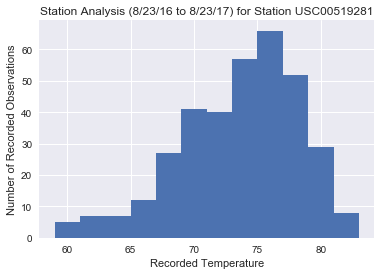

In [21]:
# plot the temperature data in a histogram with 12 bins
temp_df=pd.DataFrame(temperature)
plt.hist(temp_df['tobs'],12)
plt.xlabel("Recorded Temperature")
plt.ylabel("Number of Recorded Observations")
plt.title("Station Analysis (8/23/16 to 8/23/17) for Station " + busiest)
plt.show()

In [22]:
#Temp Analysis

# Write a function called `calc_temps` that will accept start date and end date in the format 
#'%Y-%m-%d' and return the minimum, average, and maximum temperatures for that range of dates

In [27]:

def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
############ trip dates are: 4/25/2018 - 5/7/2018#######   

    return session.query(func.min(Measurements.tobs), func.avg(Measurements.tobs), func.max(Measurements.tobs)).\
        filter(Measurements.date >= start_date).filter(Measurements.date <= end_date).all()

In [28]:
# # calculate the min/max/avg from last year that matches my trip date


In [29]:
trip_arrive = dt.date(2018, 4, 25)
trip_leave = dt.date(2018, 5, 7)
last_year = dt.timedelta(days=365)
lstyear_temp_analysis = (calc_temps((trip_arrive-last_year), (trip_leave-last_year)))
print("The Min, Avg, and Max Temperatures last year during my trip dates were:", lstyear_temp_analysis, "respectfully")

The Min, Avg, and Max Temperatures last year during my trip dates were: [(58, 74.0632911392405, 81)] respectfully


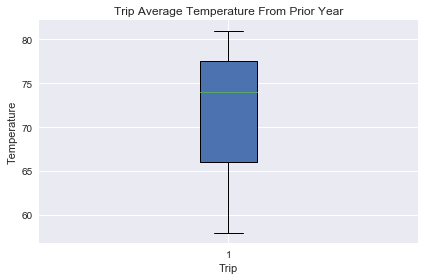

In [30]:
# plotting the data as a boxplot

fig, ax = plt.subplots()
x = range(len(lstyear_temp_analysis))
ax.boxplot(lstyear_temp_analysis, patch_artist=True)
ax.set_title('Trip Average Temperature From Prior Year')
ax.set_ylabel("Temperature")
ax.set_xlabel("Trip")
fig.tight_layout()
plt.show()
